# CSCI 2000U - Scientific Data Analysis
## Final Project: Large Passenger Plane Crashes 1933-2009

**Teacher:** Mariana Shimabukuro

> **Group #6 Members:** $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ **Student ID** $\;\;\;\;\;\;\;\;\;$ **CRN#**             
> Wahid Popal Ali Ahmad Popal $\;\;\;\;\;\;\;\;\;$ 100780969 $\;\;\;\;\;\;\;\;\;$ 45251                           
> Fardin Alam $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 100743998 $\;\;\;\;\;\;\;\;\;$ N/A 


In [196]:
#importing used libraries
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

# loading the data using pandas
df = pd.read_csv('Large_Passenger_Plane_Crashes_1933_to_2009.csv')

# preview of the data
df.head()

,Date,Time,Location,Operator,Flight..,Route,Type,Registration,cn.In,Aboard,Fatalities,Ground,Survivors,SurvivalRate,Summary,ClustID
0,4/4/33,12:30,"Off Barnegat, New Jersey",Military - U.S. Navy,NaN,NaN,Goodyear-Zeppelin U.S.S. Akron (airship),ZRS-4,NaN,76,73,0,3,0.039474,"While cruising at 1,600 feet off New Jersey, s...",High Fatality
1,3/12/50,14:50,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,NaN,Llandow - Dublin,Avro 689 Tudor 5,G-AKBY,1417,83,80,0,3,0.036145,During the approach to Runway 28 at Llandow Ai...,High Fatality
2,3/26/52,NaN,"Moscow, Russia",Aeroflot,NaN,NaN,NaN,NaN,NaN,70,70,0,0,0.000000,The plane overshot the runway and collided wit...,High Fatality
3,12/20/52,6:30,"Moses Lake, Washington",Military - U.S. Air Force,NaN,NaN,Douglas C-124A Globemaster,50-100,43238,115,87,0,28,0.243478,Within two minutes after takeoff the aircraft ...,High Fatality
4,6/18/53,16:34,"Tachikawa AFB, Tokyo, Japan",Military - U.S. Air Force,NaN,Tachikawa AB - Kimpo AB,Douglas C-124A Globemaster II,51-137A,43471,129,129,0,0,0.000000,Crashed shortly after taking off from Tachikaw...,High Fatality


In [197]:
# getting more information about the dataset's datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          456 non-null    object 
 1   Time          390 non-null    object 
 2   Location      456 non-null    object 
 3   Operator      456 non-null    object 
 4   Flight..      301 non-null    object 
 5   Route         417 non-null    object 
 6   Type          455 non-null    object 
 7   Registration  443 non-null    object 
 8   cn.In         433 non-null    object 
 9   Aboard        456 non-null    int64  
 10  Fatalities    456 non-null    int64  
 11  Ground        456 non-null    int64  
 12  Survivors     456 non-null    int64  
 13  SurvivalRate  456 non-null    float64
 14  Summary       456 non-null    object 
 15  ClustID       456 non-null    object 
dtypes: float64(1), int64(4), object(11)
memory usage: 57.1+ KB


In [198]:
# The length of dataset
len(df)

456

In [199]:
# the different columns of dataset
df.keys()

Index(['Date', 'Time', 'Location', 'Operator', 'Flight..', 'Route', 'Type',
       'Registration', 'cn.In', 'Aboard', 'Fatalities', 'Ground', 'Survivors',
       'SurvivalRate', 'Summary', 'ClustID'],
      dtype='object')

**What is the mean, std, min, 25%, 50%, 75% and max of the dataset?**

In [200]:
# observing the statistical description of the dataset
df.describe()

,Aboard,Fatalities,Ground,Survivors,SurvivalRate
count,456.000000,456.000000,456.000000,456.000000,456.000000
mean,137.256579,92.366228,6.947368,44.890351,0.266674
std,71.006407,70.641796,128.868778,78.568882,0.389414
min,69.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,59.000000,0.000000,0.000000,0.000000
50%,116.000000,85.500000,0.000000,0.000000,0.000000
75%,157.000000,120.250000,0.000000,73.500000,0.526644
max,644.000000,583.000000,2750.000000,516.000000,1.000000


**1. What is the average survival rate of all the planes?**

In [201]:
survival_Average = df['SurvivalRate'].sum()
print('The average survival rate: ', survival_Average/len(df), '%')

The average survival rate:  0.2666737569298246 %


Since our main goal is to find which airline is save and which is not we can not follow the data that does not indicate the type of plain. So, we clean the types which is Nan

In [202]:
df[df['Type'].notnull()]

,Date,Time,Location,Operator,Flight..,Route,Type,Registration,cn.In,Aboard,Fatalities,Ground,Survivors,SurvivalRate,Summary,ClustID
0,4/4/33,12:30,"Off Barnegat, New Jersey",Military - U.S. Navy,NaN,NaN,Goodyear-Zeppelin U.S.S. Akron (airship),ZRS-4,NaN,76,73,0,3,0.039474,"While cruising at 1,600 feet off New Jersey, s...",High Fatality
1,3/12/50,14:50,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,NaN,Llandow - Dublin,Avro 689 Tudor 5,G-AKBY,1417,83,80,0,3,0.036145,During the approach to Runway 28 at Llandow Ai...,High Fatality
3,12/20/52,6:30,"Moses Lake, Washington",Military - U.S. Air Force,NaN,NaN,Douglas C-124A Globemaster,50-100,43238,115,87,0,28,0.243478,Within two minutes after takeoff the aircraft ...,High Fatality
4,6/18/53,16:34,"Tachikawa AFB, Tokyo, Japan",Military - U.S. Air Force,NaN,Tachikawa AB - Kimpo AB,Douglas C-124A Globemaster II,51-137A,43471,129,129,0,0,0.000000,Crashed shortly after taking off from Tachikaw...,High Fatality
5,6/20/56,1:30,"Asbury Park, New Jersey",Linea Aeropostal Venezolana,NaN,New York City - Caracas,Lockheed 1049E-55 Super Constellation,YV-C-AMS,4561,74,74,0,0,0.000000,About 1.5 hours after taking off from New York...,High Fatality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,9/14/08,3:15,"Perm, Russia",Aeroflot,821,Moscow - Perm,Boeing B-737-505,VP-BKO,25792/2353,88,88,0,0,0.000000,The aircraft crashed into a ravine adjacent to...,High Fatality
452,1/15/09,15:06,"New York, New York",US Airways,1549,"New York, NY- Charlotte, NC",Airbus A320-214,N106US,1044,155,0,0,155,1.000000,The plane was taking off from La Guardia Airpo...,Low Fatality
453,2/25/09,10:31,"Amsterdam, Netherlands",Turkish Airlines,1951,"Istanbul, Turkey - Amsterdam, Netherlands",Boeing 737-8F2,TC-JGE,29789/1065,134,9,0,125,0.932836,The plane was on final approach to Runway 18R ...,Low Fatality
454,5/20/09,6:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112,98,2,14,0.125000,"While on approach, the military transport cras...",High Fatality


**2. What are the overall aboarded, and fatalities passangers in airplanes?**

In [203]:
aboard_passangers = df['Aboard'].sum()
fatalitied_passangers = df["Fatalities"].sum()

print("The Overall aboarded passangers:   ", aboard_passangers)
print("The Overall fatalitied passangers: ", fatalitied_passangers)

The Overall aboarded passangers:    62589
The Overall fatalitied passangers:  42119


**3. What are the maximum deaths on the ground cased by airplanes?**

In [204]:
df[df['Ground'] == df['Ground'].max()]

,Date,Time,Location,Operator,Flight..,Route,Type,Registration,cn.In,Aboard,Fatalities,Ground,Survivors,SurvivalRate,Summary,ClustID
402,9/11/01,8:47,"New York City, New York",American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,92,92,2750,0,0.0,The aircraft was hijacked shortly after it lef...,High Fatality


In [205]:
#Calculating the crashes for each plane by ascending order and save it in plain_count
plain_count = df['Type'].value_counts().sort_values(ascending = True)

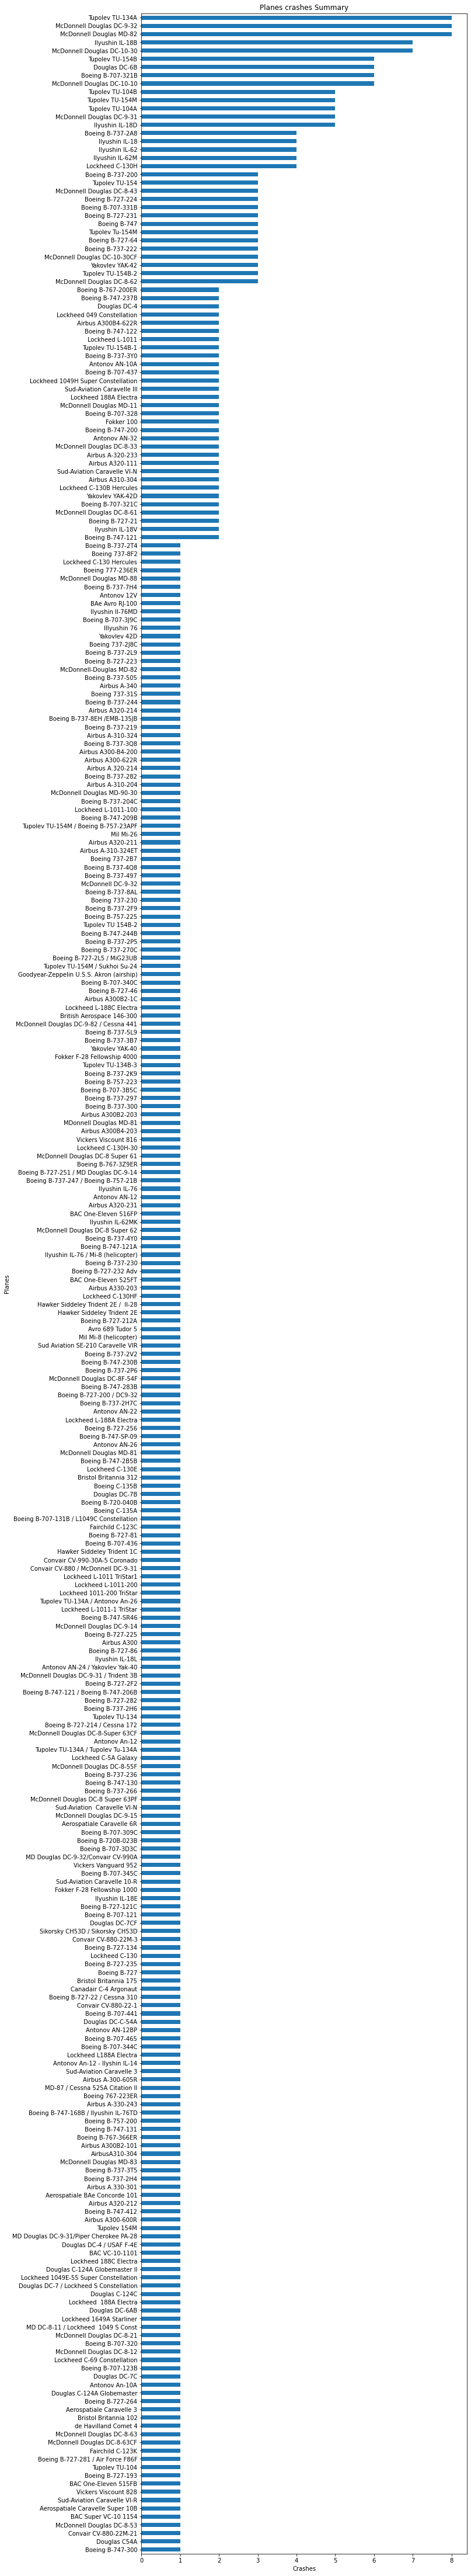

In [206]:
#ploting the diferent planes distribution using .plot.barh() method and add size, title, and  x and y label to our chart
plain_count.plot.barh(title = 'Planes crashes Summary', figsize = (10,80)).set(xlabel = 'Crashes', ylabel = 'Planes')
plt.show()

**4. Which plane has the most crashes and how many people died?**

In [207]:
#From the graph we can see that there are three planes that crashed max 8 times such as Tupolev TU-134A,
# McDonnell Douglas DC-9-32, and McDonnell Douglas MD-82.

print('Tupolev TU-134A')
df1 = df[df.apply(lambda row: row.astype(str).str.contains('Tupolev TU-134A').any(), axis=1)][['Type', 'Fatalities']]
df1.sum()

Tupolev TU-134A


Type          Tupolev TU-134ATupolev TU-134A / Tupolev Tu-13...
Fatalities                                                  834
dtype: object

In [208]:
print('McDonnell Douglas DC-9-32')
df2 = df[df.apply(lambda row: row.astype(str).str.contains('McDonnell Douglas DC-9-32').any(), axis=1)][['Type', 'Fatalities']]
df2.sum()

McDonnell Douglas DC-9-32


Type          McDonnell Douglas DC-9-32McDonnell Douglas DC-...
Fatalities                                                  659
dtype: object

In [209]:
print('McDonnell Douglas MD-82')
df3 = df[df.apply(lambda row: row.astype(str).str.contains('McDonnell Douglas MD-82').any(), axis=1)][['Type', 'Fatalities']]
df3.sum()

McDonnell Douglas MD-82


Type          McDonnell Douglas MD-82McDonnell Douglas MD-82...
Fatalities                                                  693
dtype: object

Since the three planes has the most crashes, overall the fatalities of those three planes are: **2186**            
We believe that those three planes are super dangerous and should not travel in it.

**5. Plane with the least crashes and it’s survival Rate?**

In [219]:
#First I want to count the number of occurences of each type of plane
df['Type'].value_counts()

Tupolev TU-134A                      8
McDonnell Douglas DC-9-32            8
McDonnell Douglas MD-82              8
Ilyushin IL-18B                      7
McDonnell Douglas DC-10-30           7
                                    ..
McDonnell Douglas DC-8-Super 63CF    1
Antonov An-12                        1
Tupolev TU-134A / Tupolev Tu-134A    1
Boeing B-707-340C                    1
Airbus A330-203                      1
Name: Type, Length: 308, dtype: int64

In [220]:
df4 = df[df.apply(lambda row: row.astype(str).str.contains('Airbus A330-203').any(), axis=1)][['Type', 'SurvivalRate']]
df4

,Type,SurvivalRate
455,Airbus A330-203,0.0


In [221]:
df5 = df[df.apply(lambda row: row.astype(str).str.contains('Boeing B-707-340C').any(), axis=1)][['Type', 'SurvivalRate']]
df5

,Type,SurvivalRate
194,Boeing B-707-340C,0.0


In [222]:
df6 = df[df.apply(lambda row: row.astype(str).str.contains('Tupolev TU-134A / Tupolev Tu-134A').any(), axis=1)][['Type', 'SurvivalRate']]
df6

,Type,SurvivalRate
191,Tupolev TU-134A / Tupolev Tu-134A,0.0


In [223]:
df7 = df[df.apply(lambda row: row.astype(str).str.contains('Antonov An-12').any(), axis=1)][['Type', 'SurvivalRate']]
df7

,Type,SurvivalRate
72,Antonov An-12 - Ilyshin IL-14,0.0
185,Antonov An-12,0.0


In [224]:
df8 = df[df.apply(lambda row: row.astype(str).str.contains('McDonnell Douglas DC-8-Super 63CF').any(), axis=1)][['Type', 'SurvivalRate']]
df8

,Type,SurvivalRate
184,McDonnell Douglas DC-8-Super 63CF,0.301527


Since we checked all the five planes survival Rate and the average is: **0.0603054 %**              
the possibility of those planes crashing is very small. So, we can say, those planes are save for traviling.

**6. Which year had the most crashes and how many people died?**

In [230]:
#cleaning all the rows that doesn't have Date
df[df['Date'].notnull()]

,Date,Time,Location,Operator,Flight..,Route,Type,Registration,cn.In,Aboard,Fatalities,Ground,Survivors,SurvivalRate,Summary,ClustID
0,33-04-04,12:30,"Off Barnegat, New Jersey",Military - U.S. Navy,NaN,NaN,Goodyear-Zeppelin U.S.S. Akron (airship),ZRS-4,NaN,76,73,0,3,0.039474,"While cruising at 1,600 feet off New Jersey, s...",High Fatality
1,50-03-12,14:50,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,NaN,Llandow - Dublin,Avro 689 Tudor 5,G-AKBY,1417,83,80,0,3,0.036145,During the approach to Runway 28 at Llandow Ai...,High Fatality
2,52-03-26,NaN,"Moscow, Russia",Aeroflot,NaN,NaN,NaN,NaN,NaN,70,70,0,0,0.000000,The plane overshot the runway and collided wit...,High Fatality
3,52-12-20,6:30,"Moses Lake, Washington",Military - U.S. Air Force,NaN,NaN,Douglas C-124A Globemaster,50-100,43238,115,87,0,28,0.243478,Within two minutes after takeoff the aircraft ...,High Fatality
4,53-06-18,16:34,"Tachikawa AFB, Tokyo, Japan",Military - U.S. Air Force,NaN,Tachikawa AB - Kimpo AB,Douglas C-124A Globemaster II,51-137A,43471,129,129,0,0,0.000000,Crashed shortly after taking off from Tachikaw...,High Fatality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,08-09-14,3:15,"Perm, Russia",Aeroflot,821,Moscow - Perm,Boeing B-737-505,VP-BKO,25792/2353,88,88,0,0,0.000000,The aircraft crashed into a ravine adjacent to...,High Fatality
452,09-01-15,15:06,"New York, New York",US Airways,1549,"New York, NY- Charlotte, NC",Airbus A320-214,N106US,1044,155,0,0,155,1.000000,The plane was taking off from La Guardia Airpo...,Low Fatality
453,09-02-25,10:31,"Amsterdam, Netherlands",Turkish Airlines,1951,"Istanbul, Turkey - Amsterdam, Netherlands",Boeing 737-8F2,TC-JGE,29789/1065,134,9,0,125,0.932836,The plane was on final approach to Runway 18R ...,Low Fatality
454,09-05-20,6:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112,98,2,14,0.125000,"While on approach, the military transport cras...",High Fatality


In [232]:
#converting date column into datetime type of data
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#Creating a new column for Year and put all the years in there
df['Year'] = df['Date'].dt.strftime('%y')

#Creating a new column for Months and put all the Months in there
df['Month'] = df['Date'].dt.month_name().str[:3]

#Creating a new column for Days and put all the Days in there
df['Day'] = df['Date'].dt.day

df

,Date,Time,Location,Operator,Flight..,Route,Type,Registration,cn.In,Aboard,Fatalities,Ground,Survivors,SurvivalRate,Summary,ClustID,Year,Month,Day
0,2033-04-04,12:30,"Off Barnegat, New Jersey",Military - U.S. Navy,NaN,NaN,Goodyear-Zeppelin U.S.S. Akron (airship),ZRS-4,NaN,76,73,0,3,0.039474,"While cruising at 1,600 feet off New Jersey, s...",High Fatality,1933,Apr,4.0
1,2050-03-12,14:50,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,NaN,Llandow - Dublin,Avro 689 Tudor 5,G-AKBY,1417,83,80,0,3,0.036145,During the approach to Runway 28 at Llandow Ai...,High Fatality,1950,Mar,12.0
2,2052-03-26,NaN,"Moscow, Russia",Aeroflot,NaN,NaN,NaN,NaN,NaN,70,70,0,0,0.000000,The plane overshot the runway and collided wit...,High Fatality,1952,Mar,26.0
3,2052-12-20,6:30,"Moses Lake, Washington",Military - U.S. Air Force,NaN,NaN,Douglas C-124A Globemaster,50-100,43238,115,87,0,28,0.243478,Within two minutes after takeoff the aircraft ...,High Fatality,1952,Dec,20.0
4,2053-06-18,16:34,"Tachikawa AFB, Tokyo, Japan",Military - U.S. Air Force,NaN,Tachikawa AB - Kimpo AB,Douglas C-124A Globemaster II,51-137A,43471,129,129,0,0,0.000000,Crashed shortly after taking off from Tachikaw...,High Fatality,1953,Jun,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2014-08-09,3:15,"Perm, Russia",Aeroflot,821,Moscow - Perm,Boeing B-737-505,VP-BKO,25792/2353,88,88,0,0,0.000000,The aircraft crashed into a ravine adjacent to...,High Fatality,1914,Aug,9.0
452,2015-09-01,15:06,"New York, New York",US Airways,1549,"New York, NY- Charlotte, NC",Airbus A320-214,N106US,1044,155,0,0,155,1.000000,The plane was taking off from La Guardia Airpo...,Low Fatality,1915,Sep,1.0
453,2025-09-02,10:31,"Amsterdam, Netherlands",Turkish Airlines,1951,"Istanbul, Turkey - Amsterdam, Netherlands",Boeing 737-8F2,TC-JGE,29789/1065,134,9,0,125,0.932836,The plane was on final approach to Runway 18R ...,Low Fatality,1925,Sep,2.0
454,2020-09-05,6:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112,98,2,14,0.125000,"While on approach, the military transport cras...",High Fatality,1920,Sep,5.0


In [234]:
#Counting each rows for different years
df['Year'].value_counts()

1973    17
1972    16
1974    15
1982    14
1985    14
        ..
1902     1
1950     1
1926     1
1911     1
1933     1
Name: Year, Length: 74, dtype: int64

In [242]:
print('Yes: 1973')
df8 = df[df.apply(lambda row: row.astype(str).str.contains('73').any(), axis=1)][['Year', 'Fatalities']]
df8.sum()

Yes: 1973


/tmp/ipykernel_43/1136332198.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df8.sum()


Fatalities    9170
dtype: int64

From the above data we can clearly see that **1973** has the most crashes.              
Fatalities of crashes in the 1973 year are **9170** which is a lot.

**7. We can find explore more of our data and find the time, month and day by using value_counts()**
>1. At what time does most of the crashes happened?
>2. Which month of the year had the most crashes?

In [236]:
#At what time does most of the crashes happened?
df['Time'].value_counts()

11:00    5
9:40     5
17:00    5
19:00    5
14:15    5
        ..
13:24    1
1:37     1
17:07    1
16:19    1
0:15     1
Name: Time, Length: 293, dtype: int64

From the above data we can see that **11:00** is not very a lucky time to travel. LOL

In [237]:
#Which month of the year had the most crashes?
df['Month'].value_counts()

Dec    52
Sep    46
Jul    42
Aug    41
Jun    40
Feb    40
Nov    39
Mar    34
May    34
Jan    28
Apr    27
Oct    23
Name: Month, dtype: int64

The data clearly showes that **December** is the worst month of the year to travel.

*Drawing a graph to visualize on each year and count of airplanes crashes*

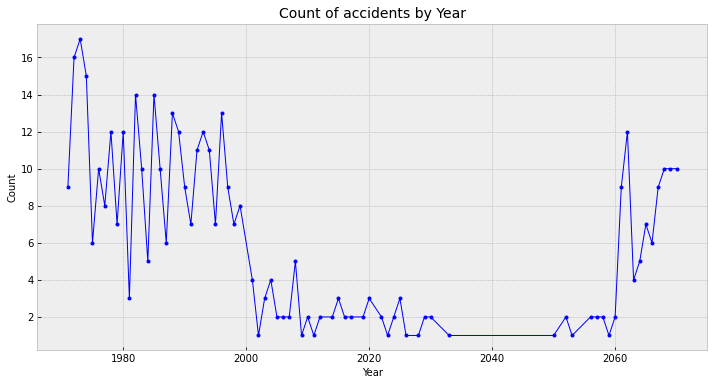

In [276]:
Temp = df.groupby(df.Date.dt.year)[['Date']].count() #Temp is going to be temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

Finding of the graph:         
in the above graph it showes the years and how manytimes pleas has crashed.

In [283]:
year_game = df.groupby('Year')['Fatalities'].mean()

<AxesSubplot:title={'center':'Fatalities per year'}, xlabel='Year'>

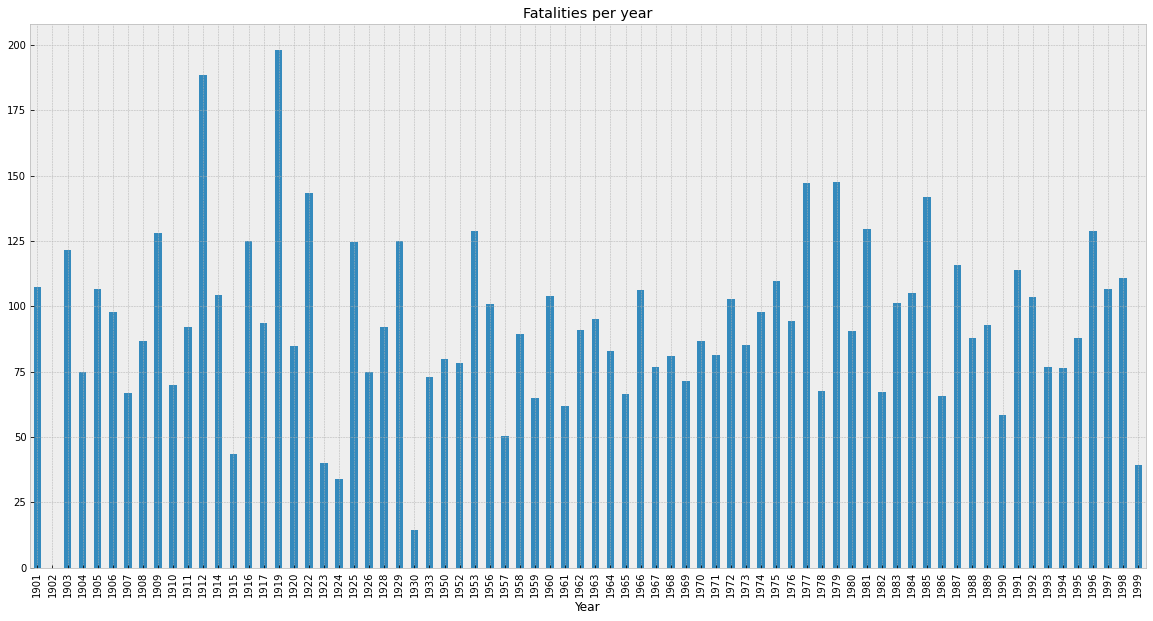

In [284]:
year_game.plot(kind = 'bar', title = 'Fatalities per year', figsize = (20,10), x = "Year")

Finding of the graph:        
The ploted graph showes Fatalities on each year. the year starts with 1933. I don't know why it showes 1901.